## Telecom Churn - ML Group Case Study
### Business Objective
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

**Derive new features**

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use business understanding to derive features that could be important indicators of churn.

**High valued customers will be defined as below**
 - Customers with prepaid connection
 - Customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months
 
**The customers will tagged with Churn(1/0) based on the fourth month as follows** :
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    total_ic_mou_9
    total_og_mou_9
    vol_2g_mb_9
    vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


## Data Understanding

In [8]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.impute import SimpleImputer
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [9]:
# Importing all datasets
telecom = pd.read_csv("telecom_churn_data.csv")
print(telecom.shape)

(99999, 226)


In [10]:
telecom.isnull().sum()/len(telecom.index)

mobile_number               0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.010180
std_og_t2o_mou              0.010180
loc_ic_t2o_mou              0.010180
last_date_of_month_6        0.000000
last_date_of_month_7        0.006010
last_date_of_month_8        0.011000
last_date_of_month_9        0.016590
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
arpu_9                      0.000000
onnet_mou_6                 0.039370
onnet_mou_7                 0.038590
onnet_mou_8                 0.053781
onnet_mou_9                 0.077451
offnet_mou_6                0.039370
offnet_mou_7                0.038590
offnet_mou_8                0.053781
offnet_mou_9                0.077451
roam_ic_mou_6               0.039370
roam_ic_mou_7               0.038590
roam_ic_mou_8               0.053781
roam_ic_mou_9               0.077451
roam_og_mou_6               0.039370
roam_og_mou_7               0.038590
r

### Handling Missing values

In [11]:
# Since the below features would be used in deriving the high value customers, we decided to impute the missing values
# with 0
cols = ['total_rech_data_6', 'total_rech_data_7','total_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
for i in cols:
    telecom[i].fillna(0, inplace=True)

In [12]:
# check the number of null values of columns over 30%
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2).to_frame()
cols = df[df[0]>30].T.columns.tolist()
cols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [13]:
#remove the columns with null values over 30%
telecom=telecom.drop(cols, axis=1)
print(telecom.shape)
telecom.info()

(99999, 192)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 192 entries, mobile_number to sep_vbc_3g
dtypes: float64(149), int64(35), object(8)
memory usage: 146.5+ MB


In [14]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [15]:
#remove all columns with a single unique value 
df = telecom.nunique().to_frame()
cols = df[df[0]==1].T.columns.tolist()
cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [16]:
telecom.shape

(99999, 192)

In [17]:
telecom.drop(cols, axis =1, inplace = True)

In [18]:
telecom.shape

(99999, 176)

#### Deriving new features

In [19]:
#Take day of week of date columns
telecom[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
date_of_last_rech_6    98392 non-null object
date_of_last_rech_7    98232 non-null object
date_of_last_rech_8    96377 non-null object
date_of_last_rech_9    95239 non-null object
dtypes: object(4)
memory usage: 3.1+ MB


In [20]:
import datetime
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'])

In [21]:
telecom['day_of_last_rech_6'] = telecom['date_of_last_rech_6'].apply(lambda x: x.day)
telecom['day_of_last_rech_7'] = telecom['date_of_last_rech_7'].apply(lambda x: x.day)
telecom['day_of_last_rech_8'] = telecom['date_of_last_rech_8'].apply(lambda x: x.day)

In [22]:
telecom[['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8', 'date_of_last_rech_9']].head()


,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,date_of_last_rech_9
0,21.0,16.0,8.0,9/28/2014
1,29.0,31.0,28.0,9/30/2014
2,17.0,24.0,14.0,9/29/2014
3,28.0,31.0,31.0,9/30/2014
4,26.0,28.0,9.0,9/28/2014


In [23]:
telecom.shape

(99999, 179)

In [24]:
telecom.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis =1, inplace = True)
print(telecom.shape)

(99999, 175)


In [25]:
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2).to_frame()

In [26]:
cols = df[df[0]>0].T.columns.tolist()
cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [27]:
for i in cols:
    if 'day_' not in i:
        telecom.loc[np.isnan(telecom[i]), [i]] = telecom[i].mean()
    else:
        telecom.loc[np.isnan(telecom[i]), [i]] = telecom[i].median()
    

In [28]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

### Deriving High value customers

In [29]:
telecom['avg_rech_amt_voc_data_6_7'] = ((telecom['total_rech_data_6']*telecom['av_rech_amt_data_6'])+
                                        (telecom['total_rech_data_7']*telecom['av_rech_amt_data_7'])+
                                        (telecom['total_rech_amt_6']+telecom['total_rech_amt_7']))/2

In [30]:
telecom[['total_rech_data_6', 'total_rech_data_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7','total_rech_amt_6', 
         'total_rech_amt_7', 'avg_rech_amt_voc_data_6_7']].head()

,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,total_rech_amt_6,total_rech_amt_7,avg_rech_amt_voc_data_6_7
0,1.0,1.0,252.0,252.0,362,252,559.0
1,0.0,1.0,0.0,154.0,74,384,306.0
2,0.0,0.0,0.0,0.0,168,315,241.5
3,0.0,0.0,0.0,0.0,230,310,270.0
4,1.0,0.0,56.0,0.0,196,350,301.0


In [31]:
telecom.avg_rech_amt_voc_data_6_7.quantile(0.70)

478.0

In [32]:
telecom = telecom[telecom['avg_rech_amt_voc_data_6_7']>=478.0]

In [33]:
telecom.shape

(30001, 176)

### Deriving the Churn (target variable)

In [34]:
#The customers will be tagged with Churn(1/0) based on the fourth month as follows** :
#Those who have not made any calls (either incoming or outgoing) 
#AND have not used mobile internet even once in the churn phase. 
telecom['churn'] = 0
telecom.loc[(telecom.total_ic_mou_9 == 0) & (telecom.total_og_mou_9 == 0) & (telecom.vol_2g_mb_9 == 0) & (telecom.vol_3g_mb_9 == 0),"churn"]=1

In [35]:
telecom.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [36]:
telecom[telecom['churn']==1].head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,avg_rech_amt_voc_data_6_7,churn
0,7000842753,197.385,214.816,213.803,21.1,132.395875,133.670805,0.000000,130.302327,197.935577,197.045133,0.000000,190.337222,9.950013,7.149898,0.000000,6.343841,13.911337,9.818732,0.00000,8.555519,47.100763,46.47301,0.000000,44.584446,93.342088,91.397131,0.000000,90.463192,3.751013,3.792985,0.000000,3.655123,1.123056,1.3685,0.000000,1.232726,144.201175,141.670476,0.000000,138.70997,79.82987,83.299598,0.000000,82.342919,87.299624,90.804137,0.00000,86.276622,1.129011,1.11501,0.000000,1.042362,168.261218,175.221436,0.000000,169.664466,0.798277,0.776572,0.000000,0.723892,3.916811,4.978279,0.000000,4.412767,0.454157,0.030235,0.000000,0.047456,0.00,0.00,0.00,0.0,47.922365,47.99052,0.160000,46.281794,107.47565,107.120493,4.130000,106.155471,12.084305,12.599697,1.150000,12.173105,167.491059,167.71954,5.440000,164.619293,9.575993,10.011904,0.000000,9.432479,20.72224,21.656415,0.000000,19.620913,2.156397,2.216923,0.000000,2.173419,32.457179,33.887833,0.000000,31.229344,0.00,0.00,5.44,0.0,0.061557,0.033585,0.000000,0.163137,7.460608,8.334936,0.000000,8.063003,0.854656,1.01296,0.0000,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,21.0,16.0,8.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,500.0,57.840000,54.680000,52.290000,130.302327,453.430000,567.160000,

In [37]:
telecom[telecom['churn']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 99887
Columns: 177 entries, mobile_number to churn
dtypes: float64(142), int64(35)
memory usage: 3.3 MB


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names

In [38]:
telecom.shape

(30001, 177)

In [39]:
cols = [c for c in telecom.columns if '_9' not in c]
cols

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [40]:
telecom=telecom[cols]
print(telecom.shape)
telecom.head()

(30001, 137)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,avg_rech_amt_voc_data_6_7,churn
0,7000842753,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,168.261218,175.221436,0.00,0.798277,0.776572,0.00,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061557,0.033585,0.0,7.460608,8.334936,0.00,0.854656,1.01296,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,21.0,16.0,8.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0000,0.00,422.160000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.26000,27.31,217.56000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.23000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.19000,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,27.0,25.0,26.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,80.630000,136.48,0.000000,0.000000,0.00,0.000000,0.000000,0.00,297.13000

This completes the data preparation

### EDA

In [6]:
def plot_continuous_chart(axe, title, plottype, col, df, log):
    axe.set_title(title)
    if log==True:
        axe.set_yscale('log')
    if (plottype=='d'):   
        sns.distplot(df[col],ax=axe)
    else: 
        sns.boxplot(data =df, x=col,ax=axe,orient='v')
        
def plot_univariate(vtype,col,hue =None,log=False,vertlabel=False, flipvertical=False):
    if vtype == 'continuous':
        fig, ax=plt.subplots(nrows =1,ncols=4,figsize=(15,5))
        plot_continuous_chart(ax[0], "Box Plot", 'b', col, telecom, log)
        plot_continuous_chart(ax[1], "Distribution Plot", 'd', col, telecom, log)
        plot_continuous_chart(ax[2], "Distribution Plot for churn", 'd', col, telecom[telecom.churn == 1], log)
        plot_continuous_chart(ax[3], "Distribution Plot for no churn", 'd', col, telecom[telecom.churn == 0], log)
    else:
        fig, ax = plt.subplots()
        hue_col = pd.Series(data = hue)
        width = len(telecom[col].unique()) + 4 + 2*len(hue_col.unique())
        if flipvertical==True:
            fig.set_size_inches(6 , 8)
            ax = sns.countplot(data = telecom, y= col, order=telecom[col].value_counts().index,hue = hue) 
        else:
            fig.set_size_inches(width , 12)
            ax = sns.countplot(data = telecom, x= col, order=telecom[col].value_counts().index,hue = hue) 
            for p in  ax.patches:
                if (p.get_height() > 0):
                    ax.annotate('{:1.2f}%'.format((p.get_height()*100)/float(len(telecom))), (p.get_x()+0.05, p.get_height()+20))  
    if (vertlabel== True): 
        plt.xticks(rotation=90)
    plt.show()        


In [7]:
plot_univariate(vtype = 'continuous', col='arpu_6', log=False)

NameError: name 'telecom' is not defined

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025C355D7510> (for post_execute):


RuntimeError: In FT2Font: Can not load face.

RuntimeError: In FT2Font: Can not load face.

<Figure size 1080x360 with 4 Axes>

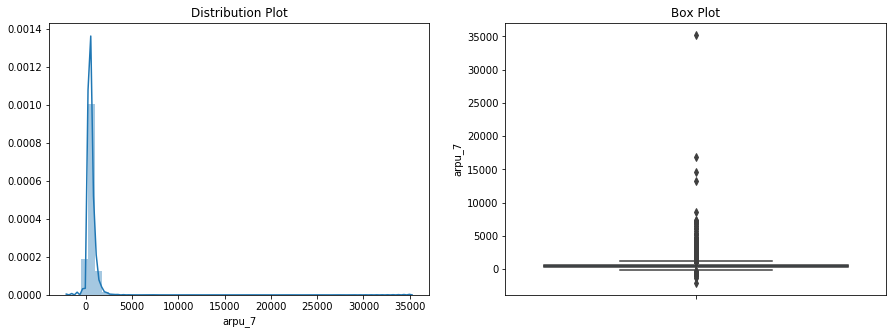

In [292]:
plot_univariate(vtype = 'continuous', col='arpu_7', log=False)

plot_univariate(vtype = 'continuous', col='arpu_7', log=False)
plot_univariate(vtype = 'continuous', col='arpu_7', log=False)
plot_univariate(vtype = 'continuous', col='arpu_7', log=False)
plot_univariate(vtype = 'continuous', col='arpu_7', log=False)

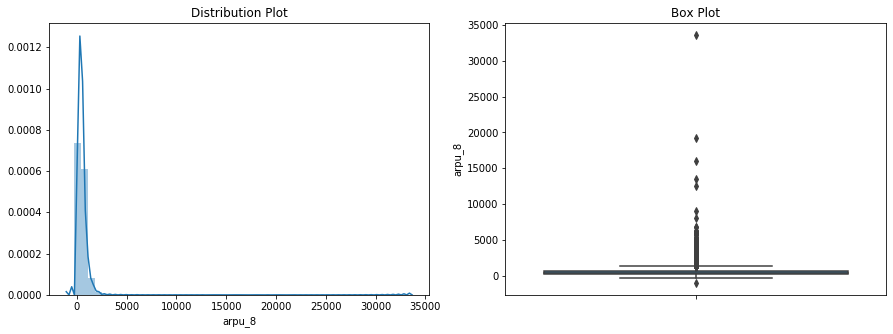

In [293]:
plot_univariate(vtype = 'continuous', col='arpu_8', log=False)

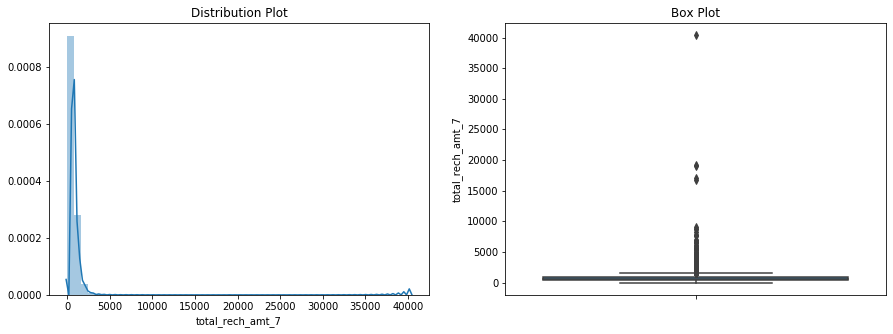

In [294]:
plot_univariate(vtype = 'continuous', col='total_rech_amt_7', log=False)

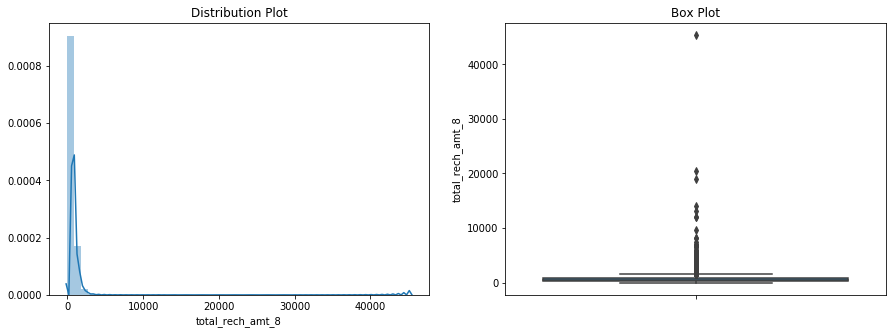

In [295]:
plot_univariate(vtype = 'continuous', col='total_rech_amt_8', log=False)

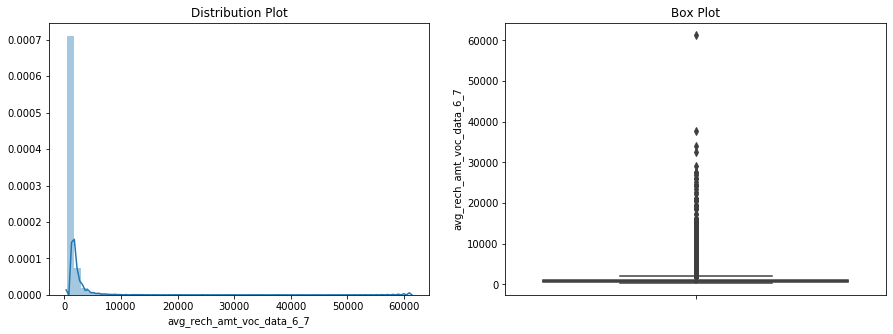

In [296]:
plot_univariate(vtype = 'continuous', col='avg_rech_amt_voc_data_6_7', log=False)

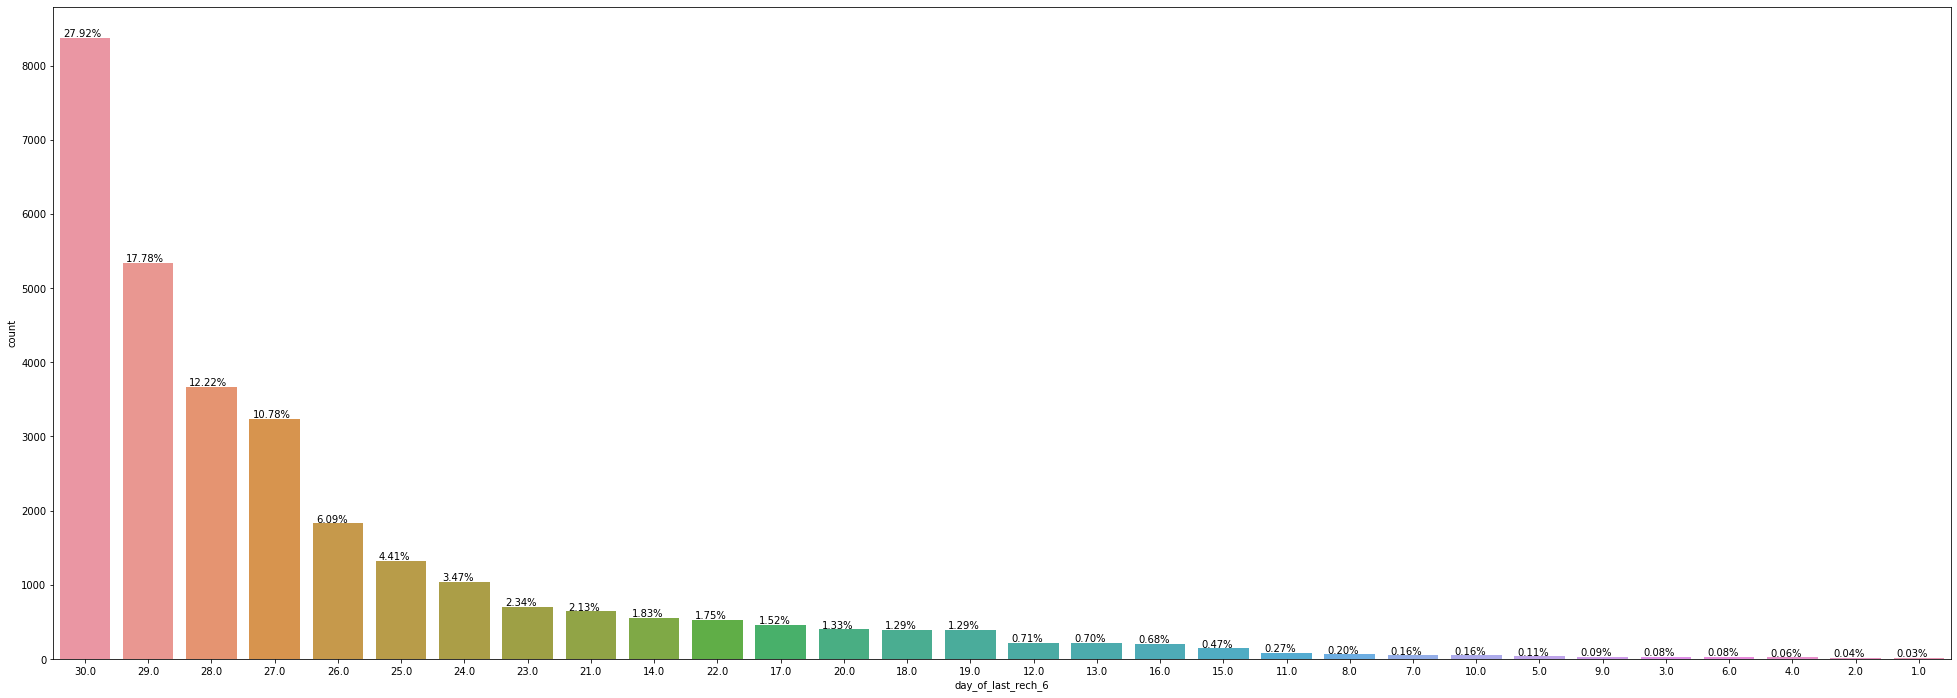

In [297]:
plot_univariate(vtype = 'categorical', col='day_of_last_rech_6')

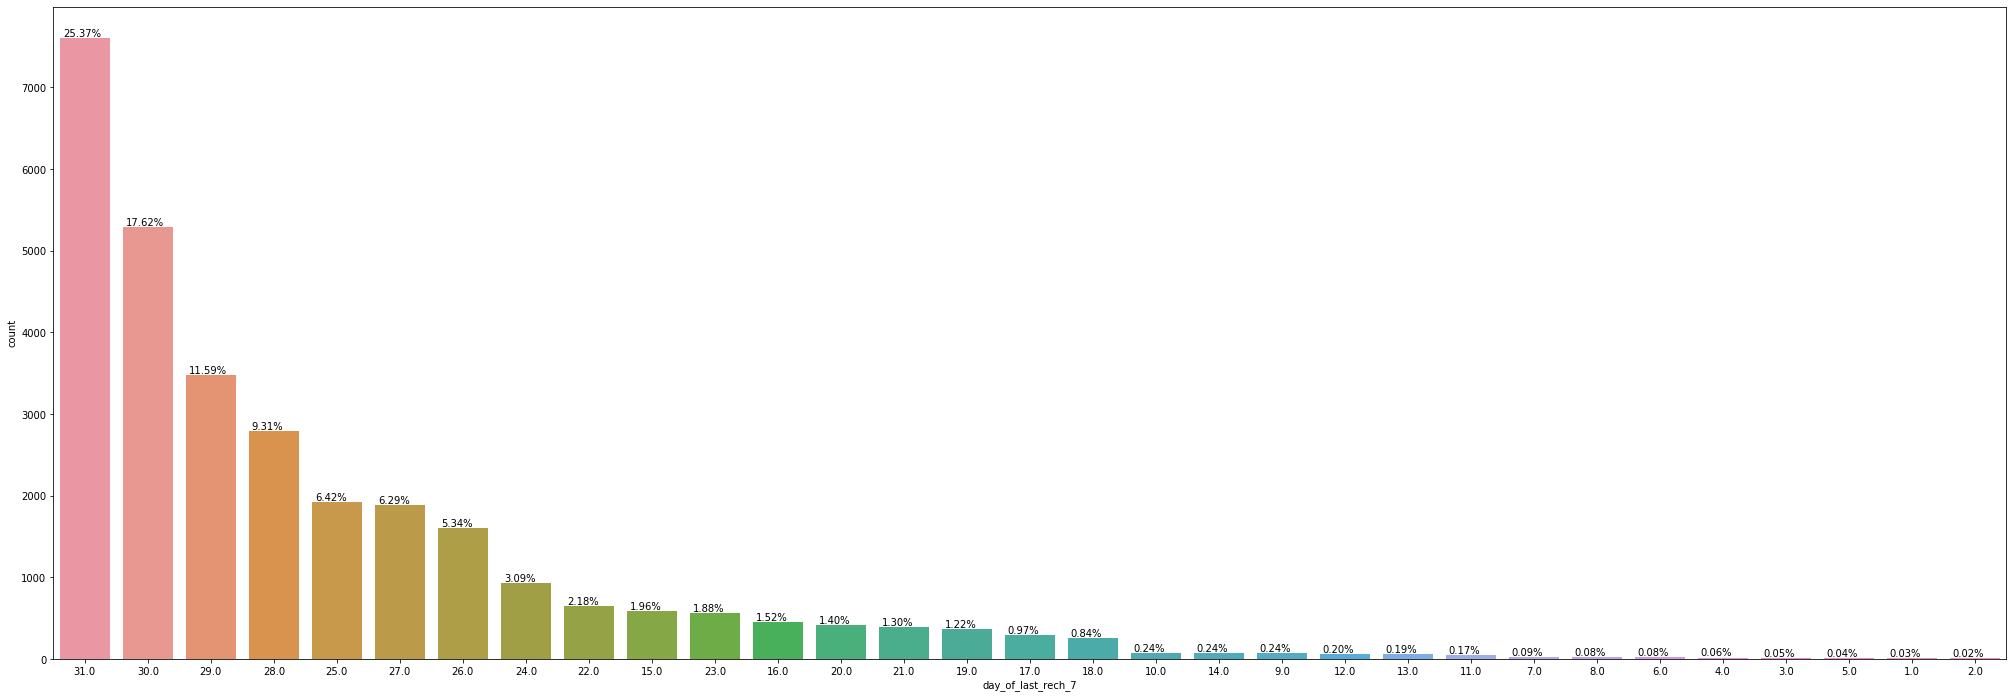

In [298]:
plot_univariate(vtype = 'categorical', col='day_of_last_rech_7')

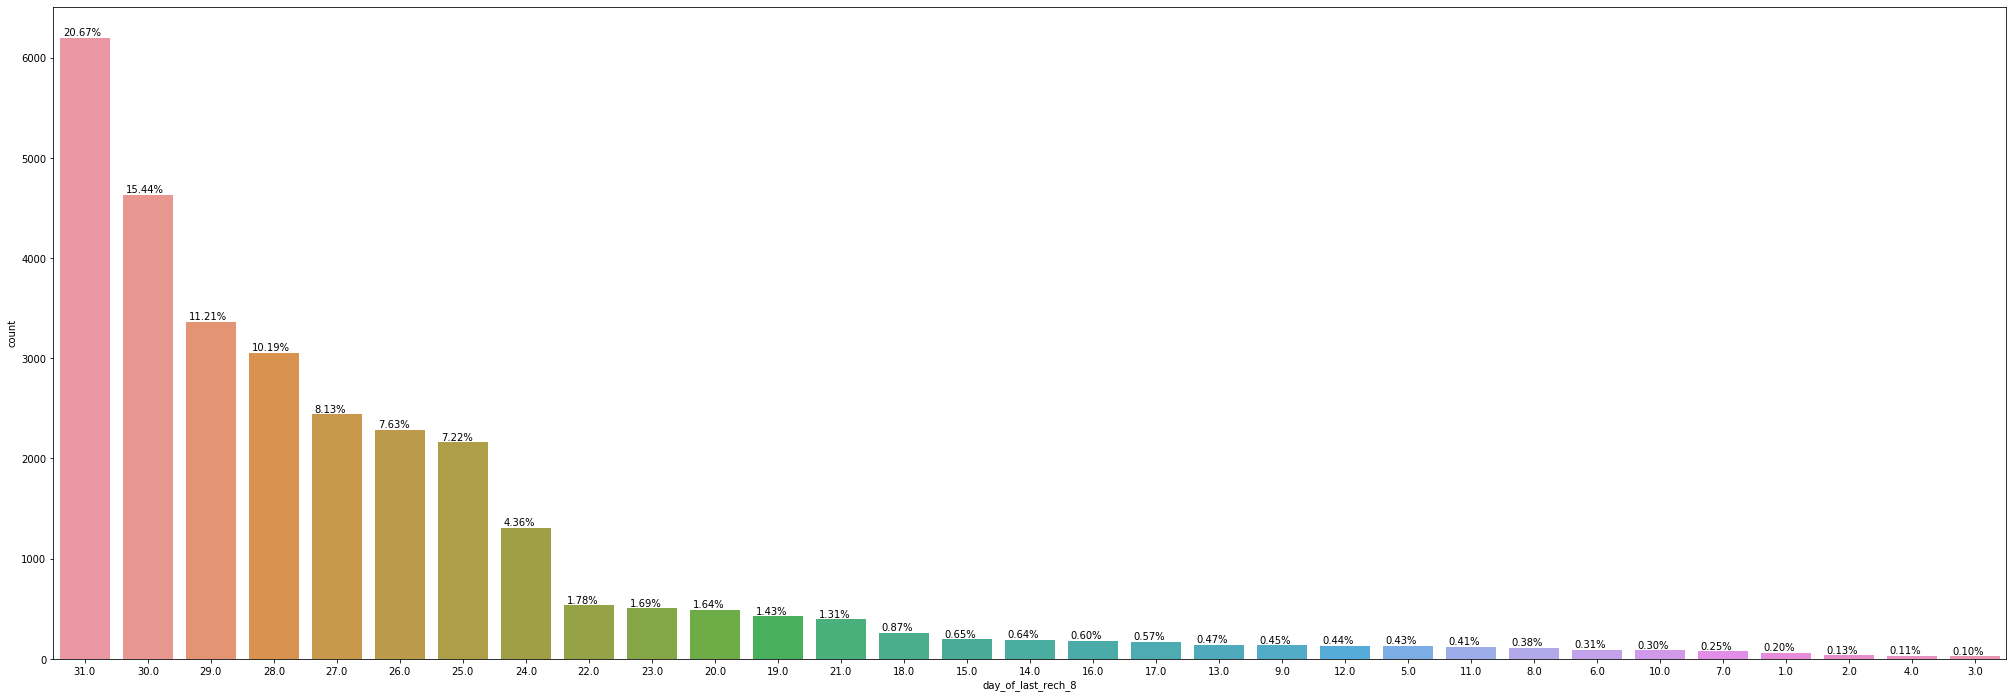

In [299]:
plot_univariate(vtype = 'categorical', col='day_of_last_rech_8')

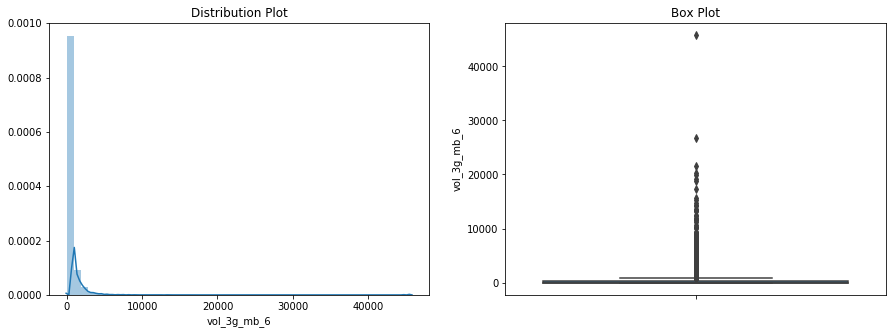

In [300]:
plot_univariate(vtype = 'continuous', col='vol_3g_mb_6', log=False)

### Bivariate Analysis

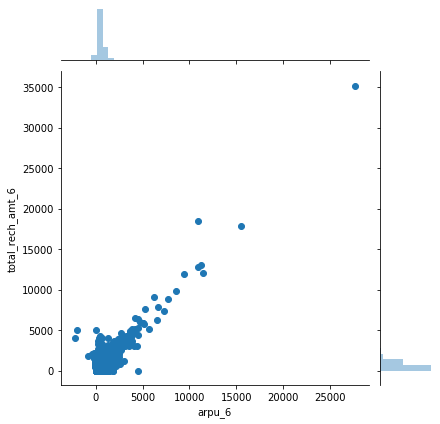

In [301]:
# joint plots of Profit and Sales

sns.jointplot('arpu_6', 'total_rech_amt_6', telecom)
plt.show()

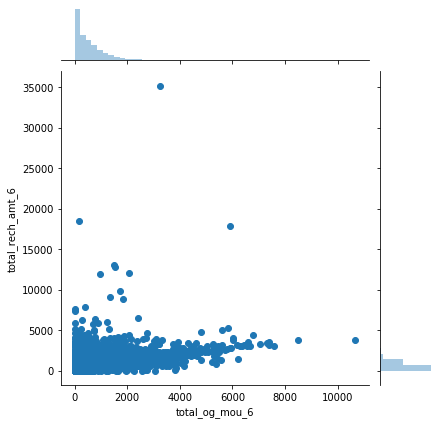

In [302]:
sns.jointplot('total_og_mou_6', 'total_rech_amt_6', telecom)
plt.show()

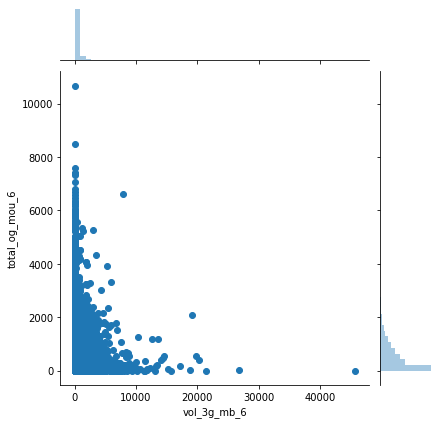

In [303]:
sns.jointplot('vol_3g_mb_6', 'total_og_mou_6', telecom)
plt.show()

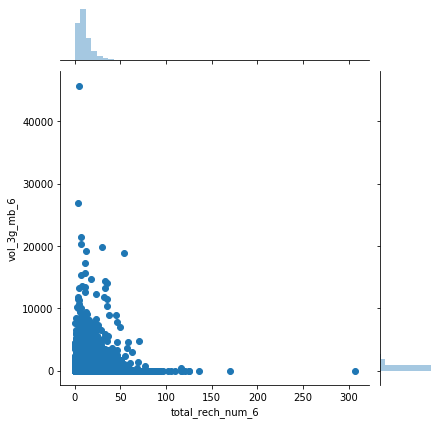

In [304]:
sns.jointplot('total_rech_num_6', 'vol_3g_mb_6', telecom)
plt.show()

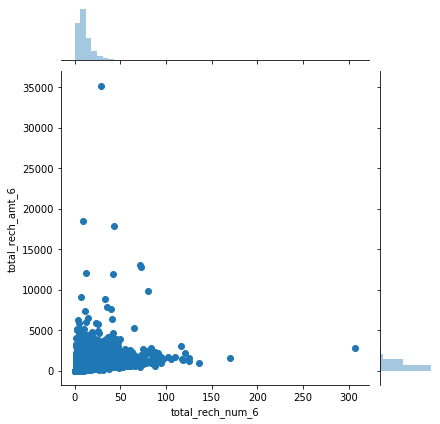

In [305]:
sns.jointplot('total_rech_num_6', 'total_rech_amt_6', telecom)
plt.show()

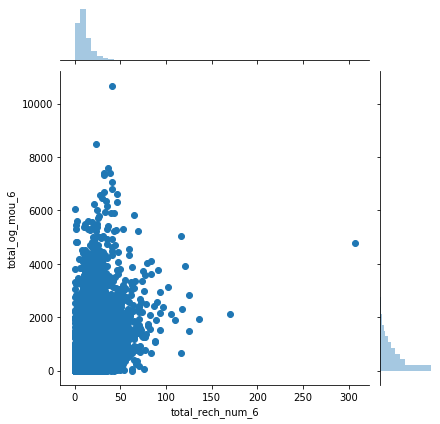

In [306]:
sns.jointplot('total_rech_num_6', 'total_og_mou_6', telecom)
plt.show()

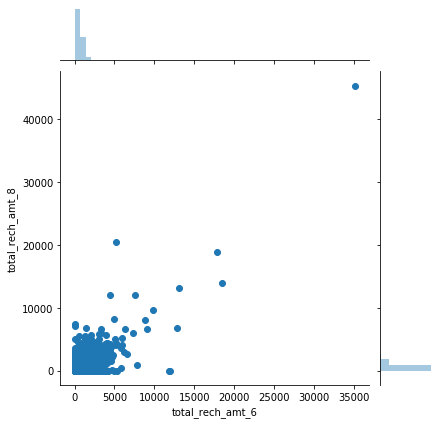

In [307]:
sns.jointplot('total_rech_amt_6', 'total_rech_amt_8', telecom)
plt.show()

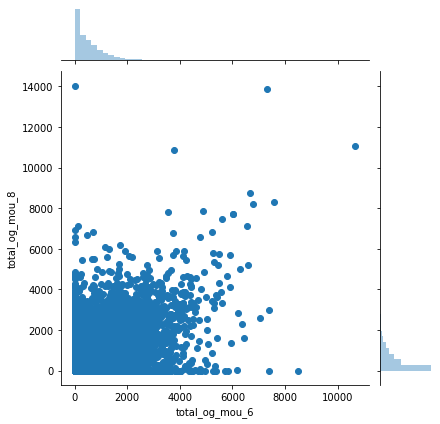

In [308]:
sns.jointplot('total_og_mou_6', 'total_og_mou_8', telecom)
plt.show()

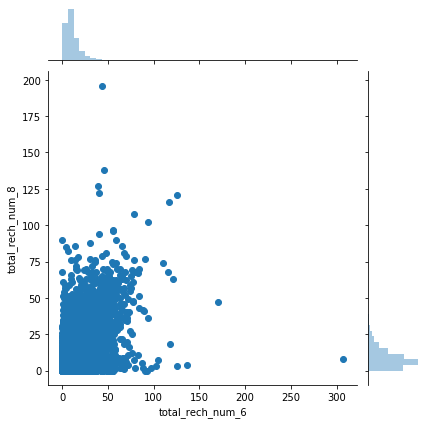

In [309]:
sns.jointplot('total_rech_num_6', 'total_rech_num_8', telecom)
plt.show()

In [310]:
corr = telecom.corr()

In [311]:
# Let's see the correlation matrix 
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(telecom.corr(),annot = True)
#plt.show()

### Checking for Outliers

In [312]:
sum(telecom['churn'])/len(telecom['churn'].index)*100

8.136395453484884

In [313]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,avg_rech_amt_voc_data_6_7,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,263.198136,270.211922,239.317807,377.289670,381.630159,342.769415,16.291107,12.770483,12.785940,26.824261,20.327835,20.255835,85.340389,86.506126,79.872795,1

In [349]:
#Remove the rows with avg_rech_amt_voc_data_6_7 percentile < 1% and > 99%
telecom.drop(telecom.loc[(telecom['avg_rech_amt_voc_data_6_7'] < 482.5) |(telecom['avg_rech_amt_voc_data_6_7'] > 6090)].index, inplace=True)

In [315]:
telecom.shape

(29445, 137)

In [316]:
telecom.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,avg_rech_amt_voc_data_6_7,churn
count,2.944500e+04,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.00000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000,29445.000000
mean,7.001206e+09,550.810228,551.737288,501.592506,264.687206,271.835628,240.132596,378.649494,383.23695,343.927965,16.356815,12.836169,12.789311,26.992325,20.387331,20.296487,85.728095,86.817350,80.077235,16

#### checking the churn rate

In [317]:
telecom.churn.value_counts()

0    27045
1     2400
Name: churn, dtype: int64

In [318]:
sum(telecom['churn'])/len(telecom['churn'].index)*100

8.150789607743251

we have 8.15% churn rate

## Model Building

Let's start by splitting our data into a training set and a test set.


### Splitting Data into Training and Test Sets

In [319]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = telecom.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

#### Feature Standardisation

In [320]:
# Standardising continuous features
scaler = StandardScaler()
scaled_telecom = (scaler.fit_transform(X.values))
scaled_telecom_df = pd.DataFrame(scaled_telecom, index=X.index, columns=X.columns)
scaled_telecom_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,avg_rech_amt_voc_data_6_7
0,-0.909566,-0.875222,-0.675250,-0.288340,-0.288397,-0.526434,-0.376038,-0.374427,-0.718649,-0.083911,-0.074650,-0.172486,-0.112173,-0.110386,-0.193716,-0.168295,-0.167683,-0.352657,-0.288243,-0.306188,-0.670327,-0.120779,-0.123497,-0.309283,-0.074561,-0.059442,-0.245787,-0.299793,-0.312245,-0.670310,-0.219544,-0.222670,-0.384469,-0.231508,-0.229893,-0.394516,-0.058288,-0.056552,-0.149173,-0.302963,-0.303972,-0.519791,-0.045201,-0.044128,-0.081402,-0.111339,-0.101445,-0.331896,-0.051792,-0.004974,-0.017859,-0.887079,-0.880287,-0.790404,-0.113957,-0.117851,-0.405551,-0.207884,-0.215543,-0.687189,-0.076205,-0.076043,-0.319055,-0.215212,-0.223611,-0.735269,-0.070556,-0.066738,-0.201888,-0.091079,-0.091331,-0.277686,-0.031086,-0.032438,-0.132938,-0.109331,-0.106873,-0.329737,-0.794514,-0.797051,-0.760553,-0.003023,0.072923,-0.254039,-0.043379,-0.045411,-0.161363,-0.023030,-0.032048,-0.098924,-0.834056,-0.928070,-0.861556,-0.619290,-0.848028,-0.631930,0.481070,0.453472,0.542898,1.064090,1.099679,1.118779,-0.231310,-0.276385,-0.201748,0.747376,0.664684,0.757196,-0.295005,-0.377259,-0.328115,-0.313752,-0.250646,-0.282816,-0.402768,-0.408625,-0.379192,-0.436934,-0.456929,-0.424510,1.477807,1.399412,1.424654,-0.235153,-0.237528,-0.190158,-0.253767,-0.333548,-0.414127,-0.129716,-0.081573,-1.164875,-2.451855,-3.576974,-0.666135
7,1.334063,2.073261,6.264442,-0.450841,-0.453277,-0.411801,0.155607,0.369865,-0.037649,-0.001661,0.271145,0.254235,-0.027889,-0.081441,0.169541,-0.149608,-0.230414,-0.175265,0.573403,1.167422,0.027788,2.504358,2.204552,2.407640,-0.252558,-0.208439,-0.245787,0.435470,0.734227,0.038298,-0.406898,-0.365308,-0.354147,-0.322633,-0.365539,-0.274777,0.405043,1.397881,1.371538,-0.479568,-0.460393,-0.391681,-0.086265,-0.076752,0.454641,-0.078211,-0.329215,-0.012582,-0.161549,-0.016172,-0.017859,-0.180995,-0.030990,-0.290426,-0.051877,-0.211472,-0.235191,0.297088,0.309208,-0.139913,2.978440,1.723853,0.570940,0.614125,0.370841,-0.139583,0.278767,-0.044907,0.229954,0.624957,0.90

In [321]:
# Splitting the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(scaled_telecom_df, y, train_size=0.7, test_size=0.3, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [322]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,avg_rech_amt_voc_data_6_7
73830,797.678,773.277,446.752,1435.79,1354.44,775.33,137.34,136.29,53.96,0.00,0.00,33.49,0.00,0.00,25.91,9.04,8.63,4.55,27.11,24.03,21.26,0.00,0.00,0.00,1.99,1.48,4.76,36.16,32.66,25.81,1426.74,1345.81,749.06,103.11,101.31,22.94,0.0,0.00,0.0,1529.86,1447.13,772.01,0.0,0.05,0.0,7.11,10.89,6.36,0.00,0.0,0.0,1573.14,1490.74,804.19,14.09,10.04,20.98,90.19,74.58,72.69,6.88,4.09,0.81,111.18,88.73,94.49,11.41,14.68,28.19,3.44,40.04,0.00,0.0,0.0,0.90,14.86,54.73,29.09,126.04,143.46,123.59,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,27,35,14,906,896,570,50,36,130,30,30,130,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,537,0.00,0.00,0.00,0.00,30.0,31.0,19.0,901.0
38263,321.947,583.400,890.917,23.14,40.01,70.09,87.51,306.39,365.98,0.00,0.00,0.00,0.00,0.00,0.00,21.24,38.99,70.09,83.28,306.28,323.84,3.20,0.00,20.76,2.93,0.00,0.00,107.73,345.28,414.71,0.00,1.01,0.00,0.00,0.11,21.36,0.0,0.00,0.0,0.00,1.13,21.36,0.0,0.00,0.0,2.93,0.00,0.00,0.90,0.0,0.0,111.56,346.41,436.08,46.58,263.06,136.68,296.98,187.31,206.48,0.49,3.68,3.88,344.06,454.06,347.04,0.00,10.19,2.60,11.03,26.58,68.16,0.0,0.0,4.31,11.03,36.78,75.08,355.09,490.84,422.13,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,13,17,14,360,746,917,154,200,198,10,23,198,2.0,5.0,2.0,179.0,238.0,352.0,10.83,22.96,71.97,1086.88,630.44,1285.66,1,1,2,1,4,0,0,0,0,0,0,0,491,858.48,481.42,457.19,0.00,30.0,30.0,30.0,1327.0
77455,777.421,96.218,26.588,1604.69,14.54,3.09,278.19,68.78,2.41,29.89,124.03,73.64,3.78,83.33,5.51,48.33,0.00,0.00,58.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,107.03,0.00,0.00,1552.58,0.00,0.00,219.13,0.00,0.00,0.0,0.00,0.0,1771.71,0.00,0.00,0.0,0.00,0.0,0.36,0.00,0.00,2.26,0.0,0.0,1881.38,0.00,0.00,72.61,0.00,0.00,32.09,0.00,0.00,0.00,0.00,0.00,104.71,0.00,0.00,16.48,0.00,0.00,46.31,0.00,0.00,0.0,0.0,0.00,62.79,0.00,0.00,168.41,0.00,0.00,0.53,0.0,0.0,0.0,0.0,0.00,0.36,0.0,0.0,15,2,3,930,50,30,128,50,30,50,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,535,0.00,0.00,0.00,0.00,27

In [323]:
y_test.value_counts()

0    8124
1     710
Name: churn, dtype: int64

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [324]:
X_train.shape
# We have 30 variables after creating our dummy variables for our categories

(20611, 135)

In [325]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [326]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [327]:
pca.components_

array([[ 1.13137706e-01,  1.32611634e-01,  1.26365157e-01, ...,
         5.70180576e-04,  6.06519654e-04,  2.79337538e-02],
       [ 1.07920158e-01,  1.22847281e-01,  1.45369052e-01, ...,
         1.60914883e-05,  2.25291709e-05,  3.83839143e-01],
       [ 5.61497938e-02,  4.85298121e-02,  6.87194430e-02, ...,
         1.16077516e-04,  1.12078207e-06, -1.00553858e-01],
       ...,
       [ 0.00000000e+00, -2.50854895e-18, -1.47216439e-18, ...,
         1.13606084e-16,  2.75272078e-17,  1.91255141e-18],
       [ 0.00000000e+00, -3.55058274e-18, -7.66684337e-19, ...,
        -2.69878318e-17,  3.61997290e-17,  1.15062702e-18],
       [ 0.00000000e+00, -1.20462750e-17,  2.97987025e-18, ...,
        -1.65089120e-15,  7.53555474e-17,  3.29738084e-17]])

In [328]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.113138,0.107920,arpu_6
1,0.132612,0.122847,arpu_7
2,0.126365,0.145369,arpu_8
3,0.145209,-0.018875,onnet_mou_6
4,0.171661,-0.010687,onnet_mou_7


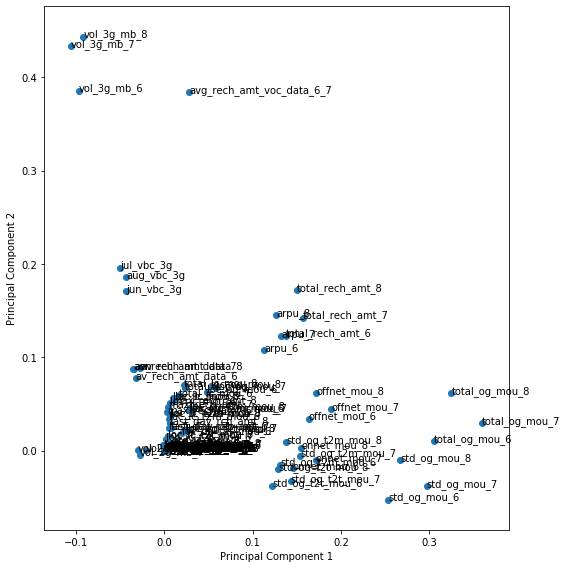

In [329]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see that the first component is in the direction where the 'total_og_mou' variables are heavy and the second component is in the direction where vol_3g_mb variables are heavy
 - These 3 components also have the highest of the loadings

#### Looking at the screeplot to assess the number of needed principal components

In [330]:
pca.explained_variance_ratio_

array([2.81022740e-01, 1.39679770e-01, 1.06050963e-01, 6.84816074e-02,
       6.00073416e-02, 5.43634502e-02, 3.74775878e-02, 3.12838761e-02,
       2.55733511e-02, 2.32357204e-02, 2.05534528e-02, 1.63420640e-02,
       1.51973064e-02, 1.14568232e-02, 1.12428348e-02, 1.07832111e-02,
       8.69251627e-03, 6.93308532e-03, 6.58446994e-03, 5.53479895e-03,
       4.67953982e-03, 4.48278831e-03, 4.31375272e-03, 4.04561314e-03,
       3.91352165e-03, 3.45635816e-03, 3.19041710e-03, 2.76592288e-03,
       2.65075520e-03, 2.38688142e-03, 2.16717580e-03, 1.83278385e-03,
       1.74146919e-03, 1.57939017e-03, 1.54053397e-03, 1.10290049e-03,
       1.03955246e-03, 8.44609954e-04, 8.18512545e-04, 8.02727668e-04,
       7.66660915e-04, 7.09394073e-04, 6.81263364e-04, 6.50108622e-04,
       6.26048033e-04, 6.07146511e-04, 5.76333514e-04, 5.37187369e-04,
       4.87275230e-04, 4.80114754e-04, 4.05759105e-04, 3.88324441e-04,
       3.81339400e-04, 3.68150344e-04, 3.15692373e-04, 2.52655165e-04,
      

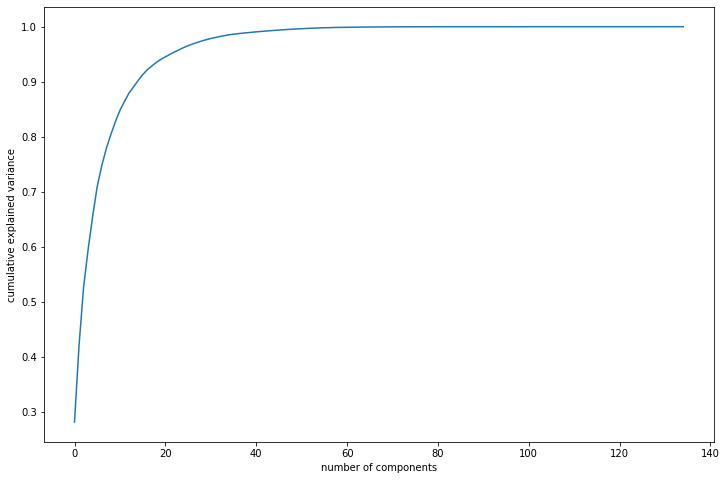

In [331]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 20 components are enough to describe 95% of the variance in the dataset
- We'll choose 20 components for our modeling

In [332]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

#### Basis transformation - getting the data onto our PCs

In [333]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20611, 20)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [334]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

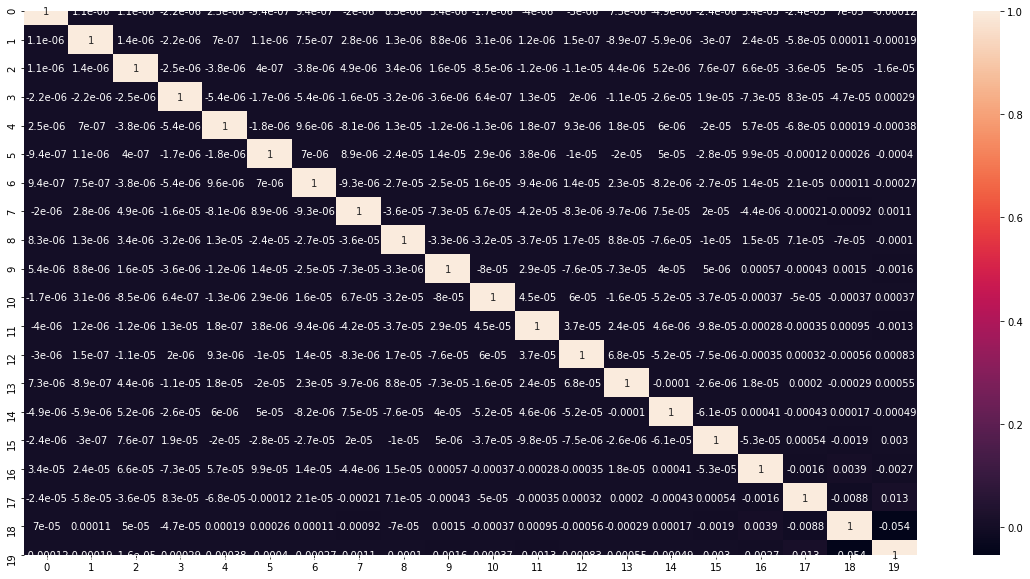

In [335]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [336]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.013399522050413655 , min corr:  -0.05411593669269057


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [337]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8834, 20)

#### Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any import information

In [338]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Note**

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is *linear*, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear. 

In [339]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

#### Impressive! The same result, without all the hard work on feature selection!

Why not take it a step further and get a little more 'unsupervised' in our approach?
This time, we'll let PCA select the number of components basen on a variance cutoff we provide

In [340]:
pca_again = PCA(0.90)

In [341]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 14 components

(20611, 15)

In [342]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [343]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(8834, 15)

In [344]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.85'

#### So there it is - a very similar result, without all the hassles. We have not only achieved dimensionality reduction, but also saved a lot of effort on feature selection.

#### Before closing, let's also visualize the data to see if we can spot any patterns

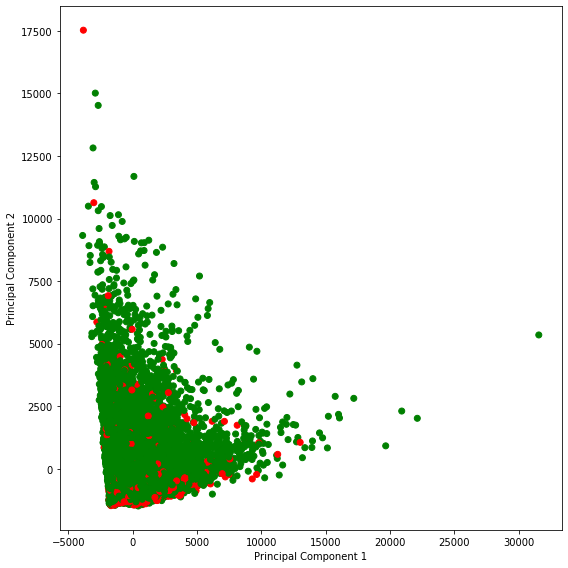

In [345]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Looks like there is a good amount of separation in 2D, but probably not enough

Let's look at it in 3D, and we expect spread to be better (dimensions of variance, remember?)

<IPython.core.display.Javascript object>


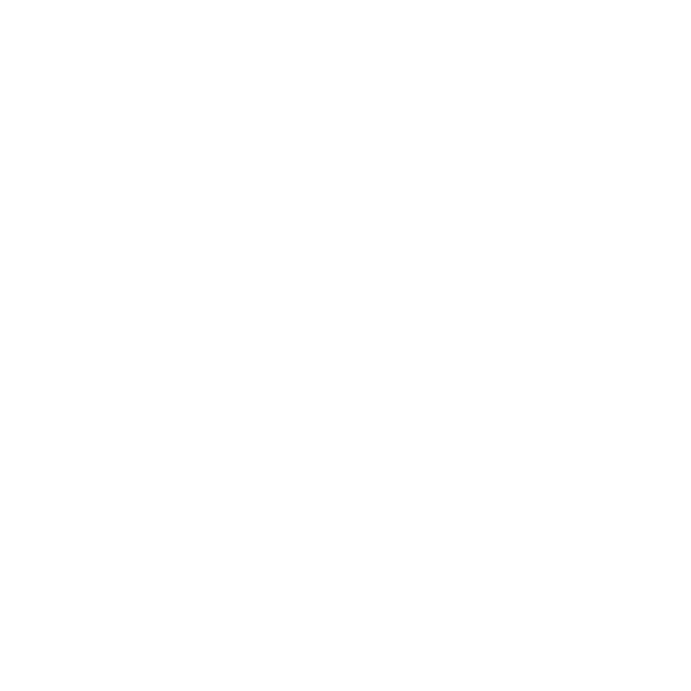

<IPython.core.display.Javascript object>


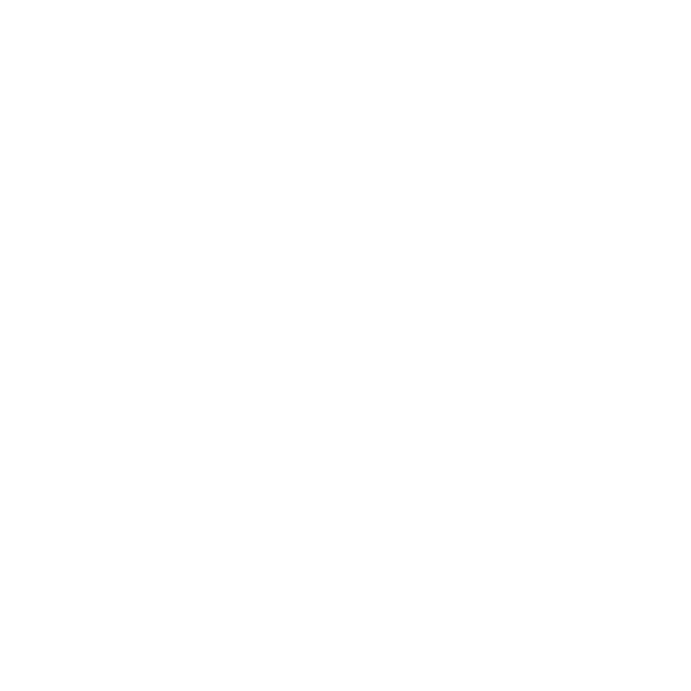

In [363]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
#ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))

##### So let's try building the model with just 5 principal components!

In [357]:
pca_last = PCA(n_components=5)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(8834, 5)

In [358]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'0.74'

### Creating logistic Regression Model

In [366]:
import statsmodels.api as sm

In [367]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20611
Model:                            GLM   Df Residuals:                    20478
Model Family:                Binomial   Df Model:                          132
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3360.5
Date:                Thu, 15 Aug 2019   Deviance:                       6721.0
Time:                        23:45:14   Pearson chi2:                 1.41e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0886      0.305     -0.291      0.771      -0.687       0.509
arpu_6                        0.0004      0.000      1.729      0.084   -5.64e-05       0.001
arpu_7                        0.0004      0.000      1.308      0.191      -0.000       0.001
arpu_8                        0.0015      0.000      3.927      0.000       0.001       0.002
onnet_mou_6                   0.0022      0.003      0.800      0.424      -0.003       0.008
onnet_mou_7                   0.0033      0.004      0.780      0.436      -0.005       0.011
onnet_mou_8                  -0.0002      0.007     -0.026      0.979      -0.013       0.013
offnet_mou_6                  0.0029      0.003      1.076      0.282      -0.002       0.008
offnet_mou_7                  0.0040      0.004      0.989      0.323      -0.004       0.012
offnet_mou_8                 -0.0018      0.007     -0.268      0.789      -0.015       0.011
roam_ic_mou_6                 0.0004      0.000      0.895      0.371      -0.001       0.001
roam_ic_mou_7                 0.0004      0.000      0.848      0.397      -0.001       0.001
roam_ic_mou_8               2.57e-05      0.000      0.063      0.950      -0.001       0.001
roam_og_mou_6                -0.0029      0.003     -1.051      0.293      -0.008       0.002
roam_og_mou_7                -0.0025      0.004     -0.618      0.536      -0.011       0.006
roam_og_mou_8                 0.0012      0.007      0.172      0.863      -0.012       0.014
loc_og_t2t_mou_6              2.5273      6.174      0.409      0.682      -9.574      14.628
loc_og_t2t_mou_7              0.4236      6.196      0.068      0.945     -11.720      12.568
loc_og_t2t_mou_8             22.5089      7.097      3.172      0.002       8.600      36.418
loc_og_t2m_mou_6              2.5260      6.174      0.409      0.682      -9.575      14.627
loc_og_t2m_mou_7              0.4229      6.196      0.068      0.946     -11.721      12.567
loc_og_t2m_mou_8             22.5108      7.097      3.172      0.002       8.602      36.420
loc_og_t2f_mou_6              2.5235      6.175      0.409      0.683      -9.578      14.625
loc_og_t2f_mou_7              0.4191      6.196      0.068      0.946     -11.725      12.564
loc_og_t2f_mou_8             22.5141      7.097      3.172      0.002       8.604      36.424
loc_og_t2c_mou_6             -0.0106      0.007     -1.605      0.109      -0.024       0.002
loc_og_t2c_mou_7              0.0017      0.005      0.367      0.714      -0.008       0.011
loc_og_t2c_mou_8              0.0181      0.008      2.278      0.023       0.003       0.034
loc_og_mou_6                  1.0603      6.612      0.160      0.873     -11.899      14.020
loc_og_mou_7                 -4.4270      6.731     -0.658      0.511     -

### Correlation Matrix

In [368]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

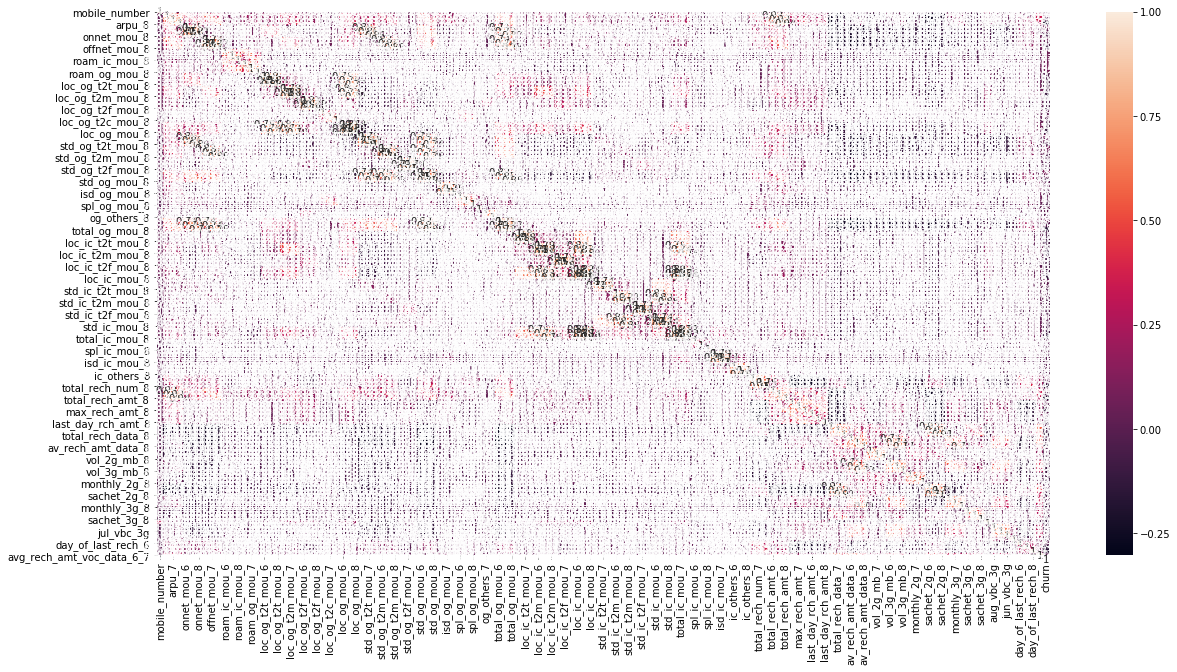

In [370]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Dropping highly correlated variables.

In [ ]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.


In [371]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

NameError: name 'X_train2' is not defined

<Figure size 1440x720 with 0 Axes>

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [373]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

NameError: name 'X_train2' is not defined

### Feature Selection Using RFE

In [374]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

ValueError: bad input shape (4, 4)